# Methodology

These numbers are extract from Git using a manual process, which may be partially automated. A rough outline of the process is the following steps:

1. Select a target sample date (e.g. Jan 1)
2. Select a commit that close to the target date
3. Checkout the tree and grep for "cls_register"
4. Count instances of "cls_register" for different object classes.

The `cloc` tool is used to calculate the lines of code metric. The script to perform the LOC analysis is called `cloc.sh` and is contained in the same directory as this script.

The sha1 points for creating this data set:

* 1/1/2010	14f2c78614ba2572022d02f91a46ca6fe62c4aee
* 1/1/2011	789cb9a403839c395db652d226f411aa7fc14a61
* 1/1/2012	f8929bad58968af04ebf7ce54dd716cc1e98195f
* 1/1/2013	e10267b531fecb7e75dc99255a98fdbb913e6049
* 1/1/2014	40018fcc845e494aabfcbacd52ce6ac1d8197b3e
* 1/1/2015	020983b0a53fd8791637702ef9a82ec7369fd448
* 1/1/2016	8ef0dfb30e636454891a5a5c8fdd77dde3417953

In [96]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
#df = pd.read_csv("data.csv", parse_dates=True, infer_datetime_format=True)
dt_parser = lambda date: pd.datetime.strptime(date, '%Y-%M-%d')
df = pd.read_csv("data.csv", parse_dates=[0], date_parser=dt_parser)
df.set_index('Date', inplace=True)

In [49]:
print df

                     Classes  Methods    LOC
Date                                        
2010-01-01 00:01:00        2        2    100
2011-01-01 00:01:00        3        9    401
2012-01-01 00:01:00        4       15    410
2013-01-01 00:01:00        7       71   4389
2014-01-01 00:01:00       11       88   6340
2015-01-01 00:01:00       12       93   6952
2016-01-01 00:01:00       16      146  11724


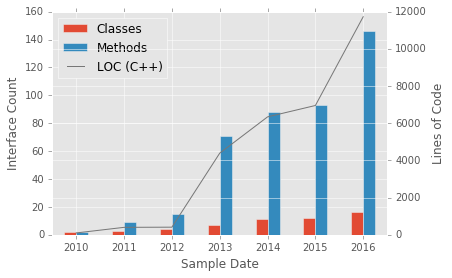

In [95]:
pos = list(range(len(df['Classes'])))
width = 0.25
pos = map(lambda x: x+width, pos)


fig, ax = plt.subplots()

plt.bar(pos, df['Classes'], width,
  color=plt.rcParams['axes.color_cycle'][0],
  label='Classes')

plt.bar([p + width for p in pos], df['Methods'], width,
  color=plt.rcParams['axes.color_cycle'][1],
  label='Methods')

ax2 = ax.twinx()
ax2.plot([p + width for p in pos], df['LOC'],
  color=plt.rcParams['axes.color_cycle'][3],
  label='LOC (C++)', marker='')

ax.set_ylabel("Interface Count")
ax.set_xlabel("Sample Date")
ax2.set_ylabel('Lines of Code')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc='upper left')

xticks = []
for date in df.index:
    year = date.strftime('%Y')
    xticks.append(year)

ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(xticks)

plt.savefig('output.png', dpi=300, bbox_inches='tight')